In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("/content/laptop_data_cleaning CSV - Copy.csv")

df.head()


,Company,Product,Type_Name,Inches,Ram,OS,Weight,Price_EUR,Screen,ScreenW,...,Retina_Display,CPU_company,CPU_Frequency_GHz,CPU_model,Primary_Storage_GB,Secondary_Storage,Primary_Storage_Type,Secondary_Storage_Type,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.shape


(1275, 23)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1275 non-null   object 
 1   Product                 1275 non-null   object 
 2   Type_Name               1275 non-null   object 
 3   Inches                  1275 non-null   float64
 4   Ram                     1275 non-null   int64  
 5   OS                      1275 non-null   object 
 6   Weight                  1275 non-null   float64
 7   Price_EUR               1275 non-null   float64
 8   Screen                  1275 non-null   object 
 9   ScreenW                 1275 non-null   int64  
 10  ScreenH                 1275 non-null   int64  
 11  Touch_Screen            1275 non-null   object 
 12  IPS_Panel               1275 non-null   object 
 13  Retina_Display          1275 non-null   object 
 14  CPU_company             1275 non-null   

In [ ]:
df.describe()


,Inches,Ram,Weight,Price_EUR,ScreenW,ScreenH,CPU_Frequency_GHz,Primary_Storage_GB,Secondary_Storage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040518,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669203,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


Exploratory Data Analysis (EDA)
Price Distribution

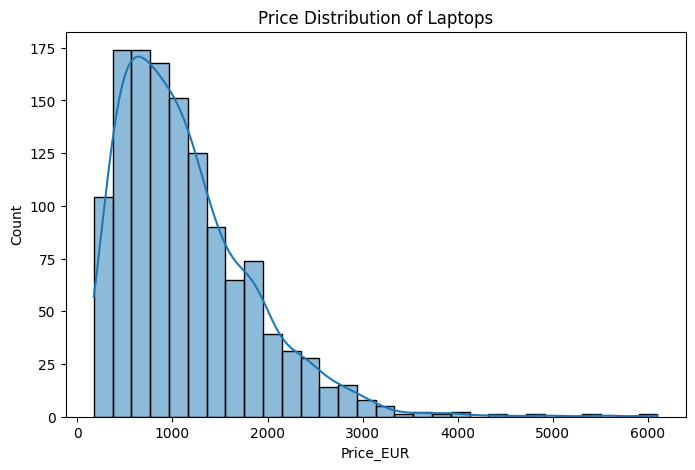

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price_EUR"], bins=30, kde=True)
plt.title("Price Distribution of Laptops")
plt.show()


Average Price by Brand

In [ ]:
brand_price = df.groupby("Company")["Price_EUR"].mean().sort_values(ascending=False)

brand_price.head(10)


,Price_EUR
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


RAM vs Price

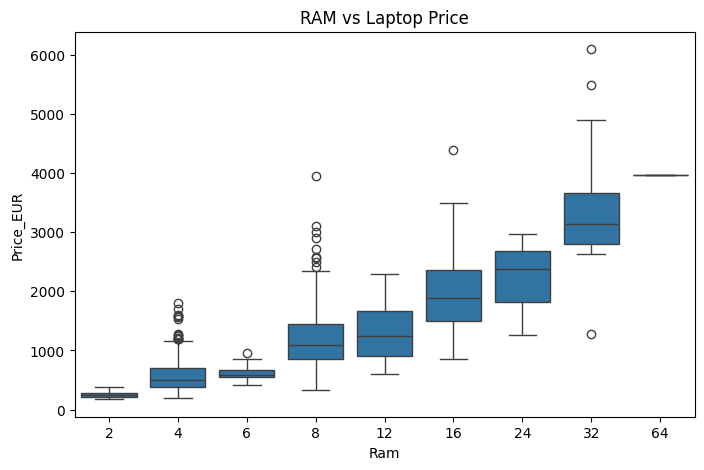

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Ram", y="Price_EUR", data=df)
plt.title("RAM vs Laptop Price")
plt.show()


Feature Selection for ML
Target Variable

In [ ]:
y = df["Price_EUR"]


Features (Independent Variables)

In [ ]:
X = df.drop("Price_EUR", axis=1)


Encoding Categorical Columns.Encode Categorical Columns

Machine Learning models cannot read text, so we encode.

In [ ]:
le = LabelEncoder()

for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Building Machine Learning Model.Linear Regression (Baseline Model)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Predictions

In [ ]:
y_pred = model.predict(X_test)


Model Evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(257.80903439431546, np.float64(358.01812615299025), 0.7417553170392442)

Actual vs Predicted Visualization

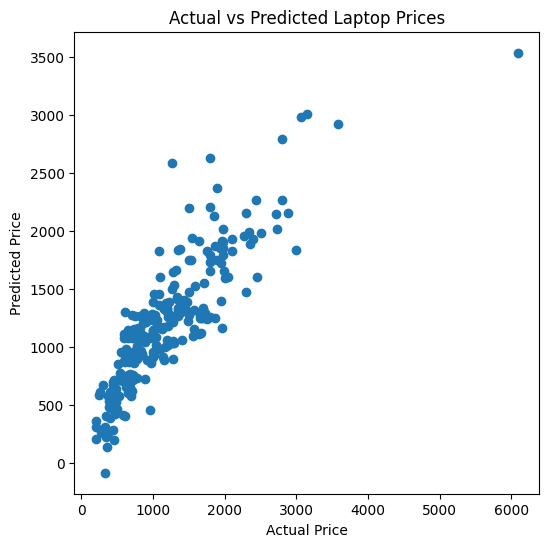

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()
